<a href="https://colab.research.google.com/github/Marcosias0400/Optimizacion/blob/main/Optimizacion_grad1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema:
EL precio de un sistema de energía solar es dado por:

U=35A+108V

donde A es la superficie del colector y V es el volumen de la bateria que almacena la energía. Debido a consideraciones de balance de energía, se puede considerar que:

A(290-100/V)=5833.3

Adicionalmente el volúmen de la batería V está relacionado a la temperatura de operación del sistema T. y esta configurado tal que:

V=50/(T-20)

Los proveedores de batería únicamente proveen modelos que trabajan entre 40 y 90 grados. Se desea optimizar el costo U considerando las limitaciones presentadas.

#Solucion:

Juntando todas las expresiones y expresando en términos de T tenemos la siguiente ecuación:

U=204615.5/(330-2T) + 10400/(T-20)

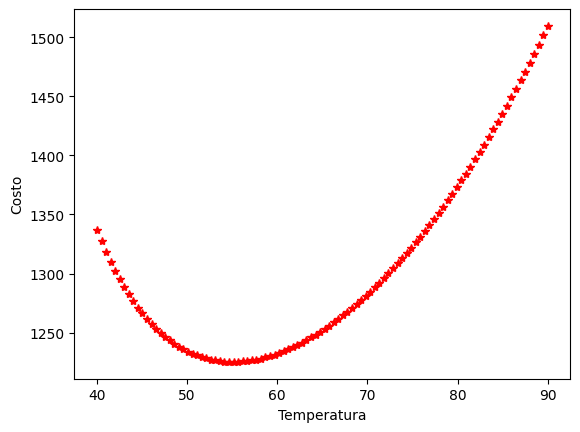

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
a=40
b=90
T=np.linspace(a,b,100)
U=204165.5/(330-2*T) + 10400/(T-20)
plt.figure()
plt.plot(T,U,'*r')
plt.xlabel('Temperatura')
plt.ylabel('Costo')
plt.show()

#Métodos Basados en gradiente

Puesto que en estos se nesecita calcular la derivada, se utilizara python para derivar la siguiente ecuación:

U=204165.5/(330-2T) + 10400/(T-20)

Entonces la primera y la segunda derivada se puede calcular de la siguiente manera:

In [7]:
import sympy as sy
import numpy as np
def calcularGradiente():
  T=sy.Symbol('T')
  fu=204165.5/(330-2*T) + 10400/(T-20)
  d1fu=sy.diff(fu)
  print(fu)
  print(d1fu)
  return None
calcularGradiente()

10400/(T - 20) + 204165.5/(330 - 2*T)
-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2


In [8]:
def U(T):
  return 204165.5/(330-2*T) + 10400/(T-20)
U(55.08)

1225.1656408350887

In [9]:
def d1U(T):
  return -10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2
d1U(55.08)

-0.0022423688924249063

#Algoritmo de la bisección:

paso1.- Definir a,b,c

paso2.- Calcular c=(a+b)/2, f'(a), f'(c)

    si f'(a)*f'(c)<0

        entonces b=c

        de otra manera a=c

    si |a-b|>tol

        entonces retorna al pas2

        de otra manera paso3

paso3.- Imprimir a, f(a)

In [10]:
def biseccion():
  a=40
  b=90
  tol=0.001
  paso=True
  cont=0
  registro=[]
  while(paso):
    c=(a+b)/2
    # Primera derivada en a
    dU_a=d1U(a)
    # Primera derivada en c
    dU_c=d1U(c)
    if dU_a*dU_c<0:
      b=c
    else:
      a=c
    # Condicion de finalizacion
    if abs(b-a)<tol:
      print('=======================================================')
      paso=False
    cont+=1
    registro.append([cont,a,U(a)])
  return registro
reg1=biseccion()
for k in reg1:
  print('It {:02} -- Temp: {:.10f} -- Costo {:.10f}'.format(k[0],k[1],k[2]))

It 01 -- Temp: 40.0000000000 -- Costo 1336.6620000000
It 02 -- Temp: 52.5000000000 -- Costo 1227.4022222222
It 03 -- Temp: 52.5000000000 -- Costo 1227.4022222222
It 04 -- Temp: 52.5000000000 -- Costo 1227.4022222222
It 05 -- Temp: 54.0625000000 -- Costo 1225.5036361287
It 06 -- Temp: 54.8437500000 -- Costo 1225.1839888051
It 07 -- Temp: 54.8437500000 -- Costo 1225.1839888051
It 08 -- Temp: 55.0390625000 -- Costo 1225.1662656061
It 09 -- Temp: 55.0390625000 -- Costo 1225.1662656061
It 10 -- Temp: 55.0390625000 -- Costo 1225.1662656061
It 11 -- Temp: 55.0634765625 -- Costo 1225.1657646744
It 12 -- Temp: 55.0756835938 -- Costo 1225.1656564351
It 13 -- Temp: 55.0817871094 -- Costo 1225.1656378426
It 14 -- Temp: 55.0817871094 -- Costo 1225.1656378426
It 15 -- Temp: 55.0833129883 -- Costo 1225.1656368938
It 16 -- Temp: 55.0833129883 -- Costo 1225.1656368938


#Evaluacion del método

Vamos a graficar el proceso de evolucion que el algoritmo para encontrar el mínimo

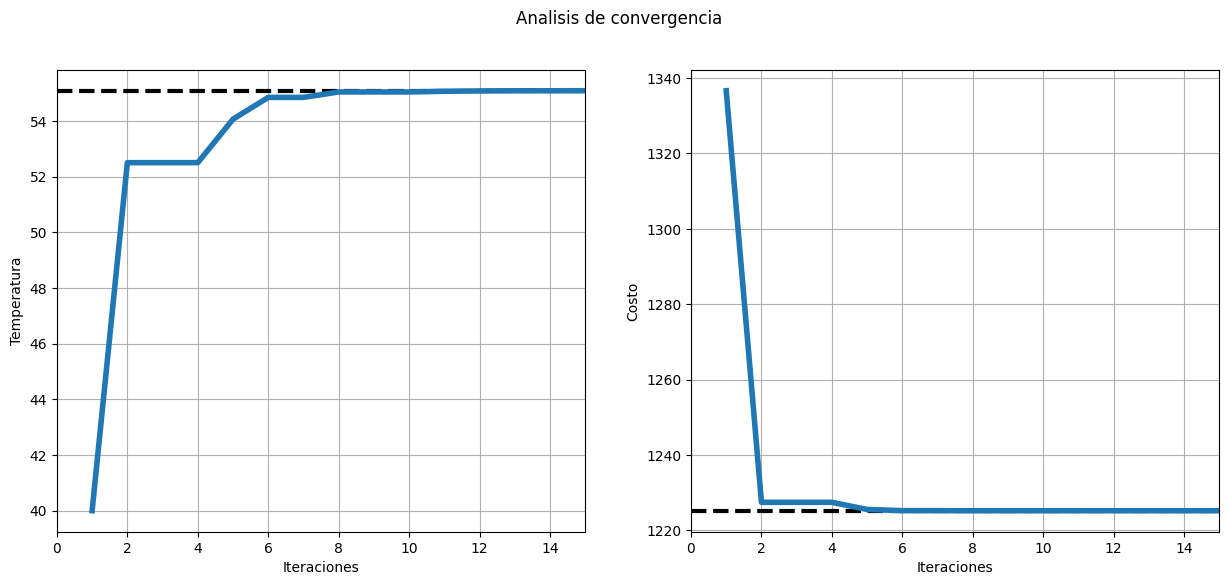

In [11]:
import matplotlib.pyplot as plt
def evaluacion(reg):
  reg=np.array(reg)
  fig,axs=plt.subplots(1,2,figsize=(15,6))
  fig.suptitle('Analisis de convergencia')
  axs[0].axhline(55.08, color='k',linewidth=3,linestyle='--')
  axs[0].plot(reg[:,0],reg[:,1],linewidth=4)
  axs[0].set_xlabel('Iteraciones')
  axs[0].set_ylabel('Temperatura')
  axs[0].grid()
  axs[0].set_xlim([0,15])
  axs[1].axhline(1225.17, color='k',linewidth=3,linestyle='--')
  axs[1].plot(reg[:,0],reg[:,2],linewidth=4)
  axs[1].set_xlabel('Iteraciones')
  axs[1].set_ylabel('Costo')
  axs[1].grid()
  axs[1].set_xlim([0,15])
  plt.show()
evaluacion(reg1)

#Método de Newton Rapson



In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

In [13]:
def plotPuntos(a,b):
  T=np.linspace(a,b,100)
  U=204165.5/(330-2*T) + 10400/(T-20)
  return T,U

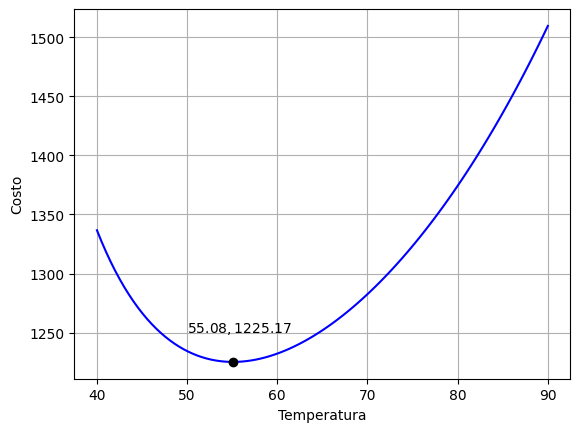

In [14]:
def GraficarFuncionObjetivo():
  a,b=40,90
  T,U=plotPuntos(a,b)
  plt.plot(T,U,'b')
  plt.plot(55.08,1225.17,'ko')
  plt.annotate(r'$55.08, 1225.17$',(55.08,1225.17),(50,1250))
  plt.xlabel('Temperatura')
  plt.ylabel('Costo')
  plt.grid()
  plt.show()
GraficarFuncionObjetivo()

# Calculo del Gradiente

Puesto que se necesita calcular la derivada se utilizará python para derivar la ecuación:

U=204165.5/(330-2T) + 10400/(T-20)

Entonces la promera y segunda derivada se puede calcular de la siguiente manera

In [15]:
def calculaGradiente():
  T=sy.Symbol('T')
  U=204165.5/(330-2*T) + 10400/(T-20)
  dif1=sy.diff(U)
  dif2=sy.diff(dif1)
  print(U)
  print(dif1)
  print(dif2)
calculaGradiente()

10400/(T - 20) + 204165.5/(330 - 2*T)
-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2
20800/(T - 20)**3 + 1633324.0/(330 - 2*T)**3


In [16]:
def d2U(T):
  return 20800/(T - 20)**3 + 1633324.0/(330 - 2*T)**3
d2U(55.08)

0.6355474551218123

# Algoritmo de newton Rapson

paso1.- Definir a,b,x,tol

paso2.- Calcular f''(x) y f'(x)

    almacenar x_{n-1}

    actualizar x_{n}=x_{n-1}-f'(x)/f''(x)

    if |x_{n}-x_{n-1}|>tol

        entonces paso2

        de otra manera paso3

paso3.- Imprimir x, f(x)

In [17]:
def newtonRaphson():
  a,b=40,90
  x=90
  tol=0.001
  cont=0
  registro=[]
  paso=True
  while paso:
    # Calculo de derivadas en un punto x_i
    d1U_x=d1U(x)
    d2U_x=d2U(x)
    xn=x
    x=xn-d1U_x/d2U_x
    U_x=U(x)
    cont+=1
    registro.append([cont,x,U_x])
    if abs(x-xn)<tol:
      paso=False
  return registro
reg=newtonRaphson()
for l in reg:
  print('It {:02} -- Temp: {:.10f} -- Costo {:.10f}'.format(l[0],l[1],l[2]))

It 01 -- Temp: 60.5730595536 -- Costo 1233.8795849955
It 02 -- Temp: 54.3709476178 -- Costo 1225.3292441409
It 03 -- Temp: 55.0684488875 -- Costo 1225.1657091464
It 04 -- Temp: 55.0835219881 -- Costo 1225.1656368790
It 05 -- Temp: 55.0835286102 -- Costo 1225.1656368790


# Evaluacion del método
Vamos a graficar la evolución del método con forme al apaso del tiempo

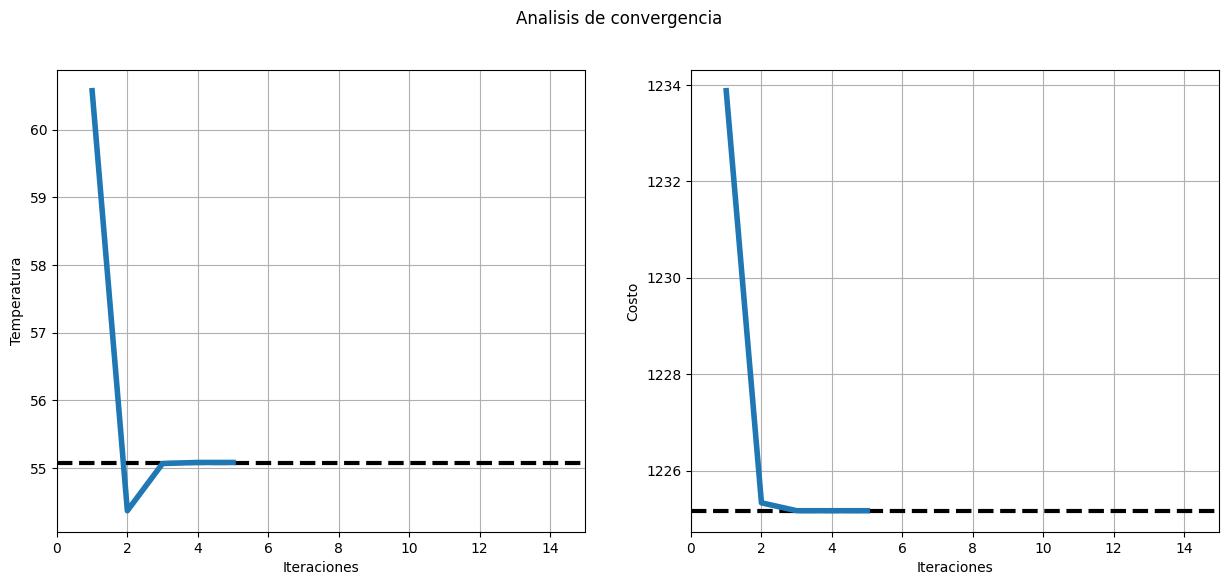

In [18]:
evaluacion(reg)

# Método de la secante

paso1.-Definir a,b,tol

paso2.-Calcular c=x_2-f'(x_2)*(x_2-x_1)/(f'(x_2)-f'(x_1))

    si f'(c)>0

        entonces b=c

        de otra manera a=c

    si |f'(c)|>tol

        entonces paso2

        de otra manera paso3

paso3.-Imprimir c, f(c)

In [19]:
def secante():
  a,b=40,90
  tol=0.001
  cont=0
  registro=[]
  paso=True
  while paso:
    # Calcular la primera derivada en a
    dU_a=d1U(a)
    dU_b=d1U(b)
    # Calculo de c
    c=b-dU_b*(b-a)/(dU_b-dU_a)
    if d1U(c)>0:
      b=c
    else:
      a=c
    cont+=1
    registro.append([cont,c,U(c)])
    if abs(d1U(c))<tol:
      paso=False
  return registro
reg=secante()
for m in reg:
  print('It {:02} -- Temp: {:.10f} -- Costo {:.10f}'.format(m[0],m[1],m[2]))

It 01 -- Temp: 67.4238416410 -- Costo 1265.4843547060
It 02 -- Temp: 60.8827888776 -- Costo 1234.8456727508
It 03 -- Temp: 57.9389356280 -- Costo 1227.6249518474
It 04 -- Temp: 56.5132183316 -- Costo 1225.7978324621
It 05 -- Temp: 55.8045366165 -- Costo 1225.3285410968
It 06 -- Temp: 55.4483617340 -- Costo 1225.2076290459
It 07 -- Temp: 55.2684366108 -- Costo 1225.1764608953
It 08 -- Temp: 55.1773211286 -- Costo 1225.1684267004
It 09 -- Temp: 55.1311231215 -- Costo 1225.1663559004
It 10 -- Temp: 55.1076851354 -- Costo 1225.1658221870
It 11 -- Temp: 55.0957904902 -- Costo 1225.1656846363
It 12 -- Temp: 55.0897530816 -- Costo 1225.1656491868
It 13 -- Temp: 55.0866884092 -- Costo 1225.1656400509
It 14 -- Temp: 55.0851326765 -- Costo 1225.1656376964
It 15 -- Temp: 55.0843429172 -- Costo 1225.1656370897


# Evaluacion del metodo

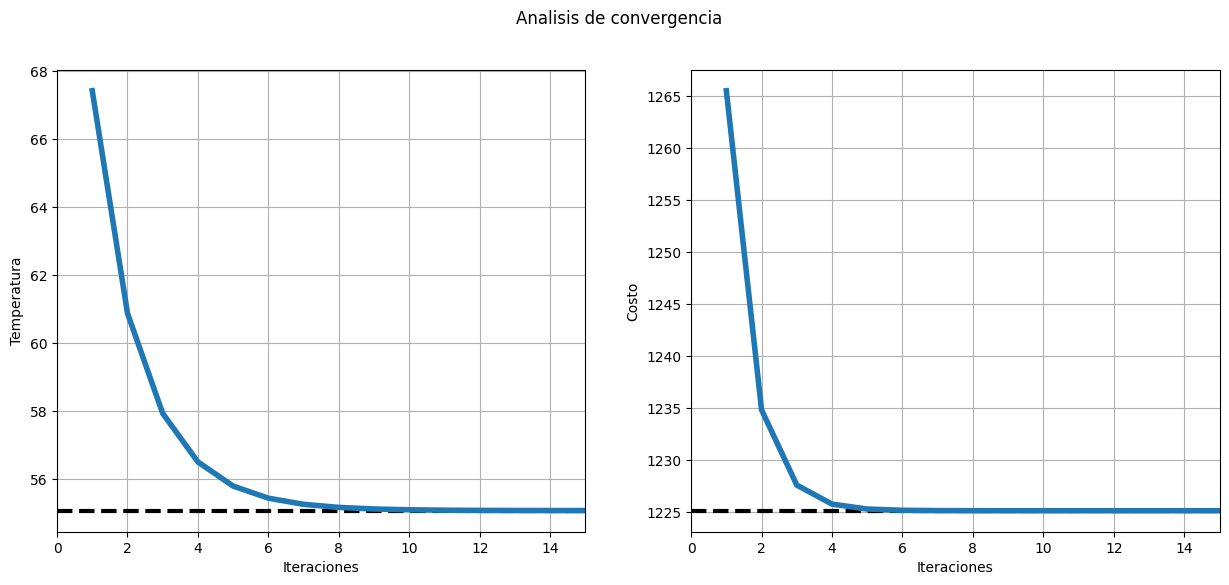

In [20]:
evaluacion(reg)

# Método de la Sección Dorada

paso1.- Definir a,b,tol,t

paso2.- Actualizar los parámetro de busqueda

    a'=a*(1-t)+b*t

    b'=a*t+b*(1-t)

paso3.-Comparar
    
    si f(a')>f(b')

        entonces a=a'

        de otra manera b=b'  

paso4.- Para parar

    si |f(a)-f(b)|>tol

        entonces paso2

        de otra manera paso5

paso5.- Imprimir a, f(a)

In [21]:
def GSSRecursivo(a,b,it=0,reg=[]):
  t=2-1.618033988
  tol=1e-6
  a1=a*(1-t)+b*t
  b1=a*t+b*(1-t)
  if U(a1)>U(b1):
    a=a1
  else:
    b=b1
  if abs(U(a1)-U(b1))>tol:
    it+=1
    reg.append([it, b1,U(b1)])
    return GSSRecursivo(a,b,it,reg)
  else:
    return reg


In [22]:
def seccionAureaB():
  a,b=40,90
  registro=GSSRecursivo(a,b,it=0,reg=[])
  return registro
reg=seccionAureaB()
for u in reg:
  print('It {:02} -- Temp: {:.10f} -- Costo {:.10f}'.format(u[0],u[1],u[2]))

It 01 -- Temp: 70.9016994000 -- Costo 1289.1675956764
It 02 -- Temp: 59.0983005162 -- Costo 1229.9349490557
It 03 -- Temp: 51.8033988320 -- Costo 1228.8272287783
It 04 -- Temp: 54.5898033362 -- Costo 1225.2438371486
It 05 -- Temp: 56.3118960242 -- Costo 1225.6340407143
It 06 -- Temp: 54.5898033438 -- Costo 1225.2438371462
It 07 -- Temp: 55.2475842172 -- Costo 1225.1741606842
It 08 -- Temp: 55.6541151536 -- Costo 1225.2679486851
It 09 -- Temp: 55.2475842190 -- Costo 1225.1741606844
It 10 -- Temp: 54.9963342842 -- Costo 1225.1680564677
It 11 -- Temp: 55.0923032198 -- Costo 1225.1656613364
It 12 -- Temp: 55.1516152838 -- Costo 1225.1671077686
It 13 -- Temp: 55.0923032201 -- Costo 1225.1656613364
It 14 -- Temp: 55.1149584125 -- Costo 1225.1659505305
It 15 -- Temp: 55.0923032202 -- Costo 1225.1656613364
It 16 -- Temp: 55.0783015413 -- Costo 1225.1656455604
It 17 -- Temp: 55.0836497068 -- Costo 1225.1656368837
It 18 -- Temp: 55.0869550548 -- Costo 1225.1656406088
It 19 -- Temp: 55.0836497068

#Evaluacion del método

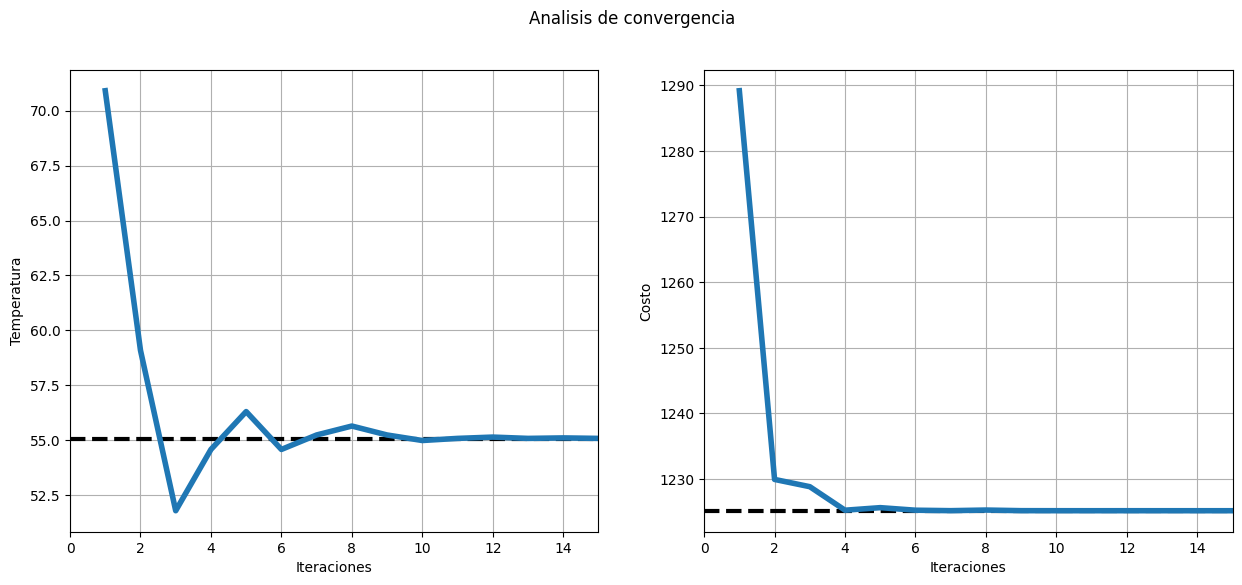

In [23]:
evaluacion(reg)

#Método de Fibonacci

paso1.- definir N

paso2.- Calcular la serie de fibonacci con n valores

paso3.- Definir a,b,L,k=2, tol

paso4.- Calcular L', x_a,x_b,f(x_a),f(x_b)

paso5.-

    si f(x_a)>f(x_b)

        entonces a=x_a

        de otra manera b=x_b

paso6.- incrementa k

paso7.-

    si |a-b|>tol

        entonces paso4

        de otra manera paso8

paso8.- imprimir x_a, f(x_a)


In [34]:
n=30
def fib(n:int)->list:
  F=[1,1]
  for i in range(n):
    F.append(F[-1]+F[-2])
  return F
f=fib(n)
print(f[31])
print(len(f))

2178309
32


In [42]:
def Fibonacci(*param):
  a=param[0]
  b=param[1]
  k=param[2]
  it=param[3]
  reg=param[4]
  L=param[5]
  n=param[6]
  fs=param[7]
  tol=param[8]
  Lk=L*fs[-k]/fs[-1]
  xa=a+Lk
  xb=b-Lk
  if U(xa)>U(xb):
    a=xa
  else:
    b=xb
  k+=1
  it+=1
  reg.append([it,xa,U(xa)])
  if abs(a-b)>tol:
    return Fibonacci(a,b,k,it,reg,L,n,fs,tol)
  else:
    return reg

In [43]:
def fibOp(n,fibs):
  a,b=40,90
  return Fibonacci(a,b,2,0,[],b-a,n,fibs,1e-6)
reg=fibOp(n,f)
for r in reg:
  print('It {:02} -- Temp: {:.10f} -- Costo {:.10f}'.format(r[0],r[1],r[2]))

It 01 -- Temp: 70.9016994375 -- Costo 1289.1675959582
It 02 -- Temp: 90.0000000000 -- Costo 1509.6747619048
